# Box Office Analysis: Maximizing Movie Revenue

## Aperçu
Dans ce projet, nous analysons les données de recettes de films (bom.movie_gross.csv.gz) pour comprendre quels facteurs influencent le succès financier d'un film.

L'objectif est de formuler des recommandations commerciales claires pour un studio de cinéma en se basant uniquement sur les revenus du box office.

## Compréhension des Affaires
Le studio veut maximiser ses revenus au box office.  
Voici les questions clés :

- Quels types de films rapportent le plus ?
- Quels studios dominent le marché ?
- Y a-t-il une saisonnalité dans les sorties les plus rentables ?
- Le marché domestique (US) ou international est-il plus stratégique ?

*Livrable final :*  
3 recommandations basées sur les résultats.

## Compréhension des Données
Le fichier utilisé : bom.movie_gross.csv.gz

### Principales colonnes :

| Colonne | Description |
|---|---|
| title | Titre du film |
| studio | Studio producteur |
| domestic_gross | Revenus aux États-Unis |
| worldwide_gross | Revenus mondiaux |
| year | Année de sortie |

---

## Préparation de Données
- *Chargement des données* : pd.read_csv
- *Nettoyage* :
  - Supprimer les $ et , dans les colonnes domestic_gross et worldwide_gross
  - Convertir en format numérique
  - Vérifier les valeurs manquantes
- *Création de nouvelles colonnes* si nécessaire : 
  - International_gross = Worldwide_gross - Domestic_gross



## Description du Code

Le code ci-dessous importe les bibliothèques essentielles pour une analyse de données cinématographiques ou toute autre analyse exploratoire de données :

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Chargement des Données CSV

Le code suivant permet de charger un fichier CSV contenant des données sur les revenus des films :

In [3]:
#charger le fichier csv
df=pd.read_csv('bom.movie_gross.csv')
print(df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


## Comptage des valeurs manquantes dans chaque colonne

Cette étape permet d’identifier combien de valeurs manquantes (NaN) il y a par colonne dans le DataFrame.  
C’est une étape essentielle pour comprendre la qualité des données avant l’analyse.

### Code :

In [5]:
# Nombre de valeurs manquantes par colonne
print(df.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


## Affichage des noms des colonnes du DataFrame

Cette commande affiche la liste complète des colonnes présentes dans le DataFrame df.  
Cela permet de vérifier la structure des données et de s’assurer que toutes les colonnes attendues sont bien chargées.

### Code :

In [27]:
print(df.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


## Nettoyage des colonnes financières et création d'une colonne total_gross

Ce bloc de code a pour but de nettoyer les données des colonnes financières et de créer une nouvelle colonne représentant le total des recettes.

### Étapes :

In [6]:
# Les colonnes à nettoyer
cols_to_clean = ['domestic_gross', 'foreign_gross']

# Suppression des $, virgules et conversion en float
for col in cols_to_clean:
    df[col] = df[col].replace(r'[\$,]', '', regex=True).replace('', np.nan).astype(float)

# Créer une colonne total_gross = domestic + foreign
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

# Vérification
print(df[cols_to_clean + ['total_gross']].head(10))

   domestic_gross  foreign_gross   total_gross
0     415000000.0    652000000.0  1.067000e+09
1     334200000.0    691300000.0  1.025500e+09
2     296000000.0    664300000.0  9.603000e+08
3     292600000.0    535700000.0  8.283000e+08
4     238700000.0    513900000.0  7.526000e+08
5     300500000.0    398000000.0  6.985000e+08
6     312400000.0    311500000.0  6.239000e+08
7     200800000.0    391000000.0  5.918000e+08
8     251500000.0    291600000.0  5.431000e+08
9     217600000.0    277300000.0  4.949000e+08


## Comptage des valeurs manquantes par colonne

Cette commande permet de déterminer combien de valeurs manquantes (NaN) sont présentes dans chaque colonne du DataFrame df.  
C’est une étape importante pour évaluer la qualité des données avant toute analyse.

### Code :

In [7]:
# Nombre de valeurs manquantes par colonne
print(df.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
total_gross       1378
dtype: int64


## Nettoyage des espaces dans les colonnes studio et title

Les colonnes textuelles peuvent contenir des espaces indésirables au début ou à la fin des chaînes de caractères.  
Cela peut provoquer des erreurs ou des doublons lors des analyses.

### Code :

In [8]:
#Nettoyer les espaces ou anomalies dans studio et title                                                           
df['studio'] = df['studio'].str.strip()
df['title'] = df['title'].str.strip()

## Assurer que la colonne year est bien de type numérique

Il est important de s'assurer que la colonne year contient des *valeurs numériques* pour pouvoir effectuer des analyses temporelles (ex : regroupement par année, tri, etc.).

In [9]:
#assurer que la colonne year est bien numérique                                                                                                                                                  
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
# Vérifier les années présentes
print(df['year'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2018]


## Suppression des valeurs aberrantes dans total_gross

Certains films peuvent avoir des valeurs extrêmes ou incorrectes dans la colonne total_gross, souvent à cause d'erreurs de saisie ou d'importation.  
Pour éviter que ces valeurs biaisent les analyses, on filtre les données.

### Code

In [13]:
df_clean = df[df['total_gross'] < 2_000_000_000]

## Calcul des revenus moyens par studio

L'objectif ici est de connaître les *studios les plus rentables* en calculant la moyenne des recettes totales (total_gross) pour chaque studio.

### Code :

In [14]:
# Calcul des revenus moyens par studio
studio_avg = df_clean.groupby('studio')['total_gross'].mean().sort_values(ascending=False).head(10)

## Analyses et Recommendations

### Analyses possibles

| Analyse | Outil Statistique | Cas d'utilisation |
|----------|-------------------|-------------------|
| *Top studios par revenus* | Statistiques descriptives (moyenne, médiane) | Identifier les studios les plus rentables |
| *Distribution des revenus* | Histogrammes + *PDF (Probability Density Function)* | Visualiser la répartition des revenus |
| *Comparaison des revenus domestiques vs internationaux* | Diagrammes circulaires + comparaison des moyennes | Vérifier l’importance des marchés étrangers |
| *Évolution temporelle des revenus* | Courbes temporelles (Line plot) | Identifier les années les plus lucratives |
| *ANOVA (Analyse de Variance)* | scipy.stats.f_oneway() | Comparer les revenus moyens entre studios ou années |
| *Régression linéaire* | statsmodels ou sklearn.linear_model | Prédire les revenus en fonction des années |
| *Puissance statistique* | statsmodels.stats.power | Vérifier si l’échantillon est assez grand pour détecter une différence |
| *PMF (Probability Mass Function)* | Distribution discrète (ex : nombre de films par studio) | Voir la probabilité qu’un film aléatoire appartienne à un studio donné |

---

### Visualisations recommandées

- *Barplot* : Revenus moyens par studio
- *Histogramme avec PDF* : Distribution des revenus total_gross
- *Boxplot* : Comparaison des revenus par studio
- *Courbe temporelle* : Évolution des revenus au fil des années
- *Nuage de points + régression linéaire* : Relation entre l’année et les revenus

---

## Visualisation : Top 10 des Studios par Revenu Moyen

Après avoir calculé les revenus moyens par studio, on utilise un *diagramme en barres horizontales* pour visualiser les *10 studios les plus rentables*.

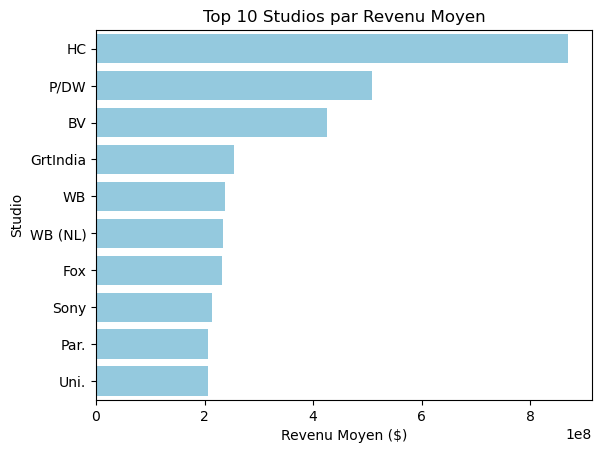

In [15]:
sns.barplot(x=studio_avg.values, y=studio_avg.index, color="skyblue")
plt.title("Top 10 Studios par Revenu Moyen")
plt.xlabel("Revenu Moyen ($)")
plt.ylabel("Studio")
plt.show()

## Visualisation : Distribution des Revenus Totaux des Films

Cette partie du code permet de visualiser la **distribution des recettes totales (total_gross)** des films à l'aide d'un *histogramme avec courbe de densité (PDF)*.

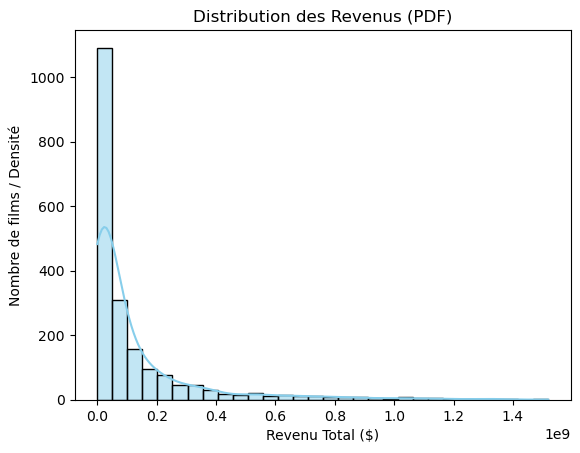

In [16]:
# Histogramme avec courbe de densité (PDF)
sns.histplot(df_clean['total_gross'], kde=True, color="skyblue", bins=30)
plt.title("Distribution des Revenus (PDF)")
plt.xlabel("Revenu Total ($)")
plt.ylabel("Nombre de films / Densité")
plt.show()

## Visualisation : Régression Linéaire entre l'Année et les Revenus Totaux

Cette visualisation permet d’observer la **relation entre l’année de sortie d’un film (year) et ses recettes totales (total_gross)** grâce à une *régression linéaire*.

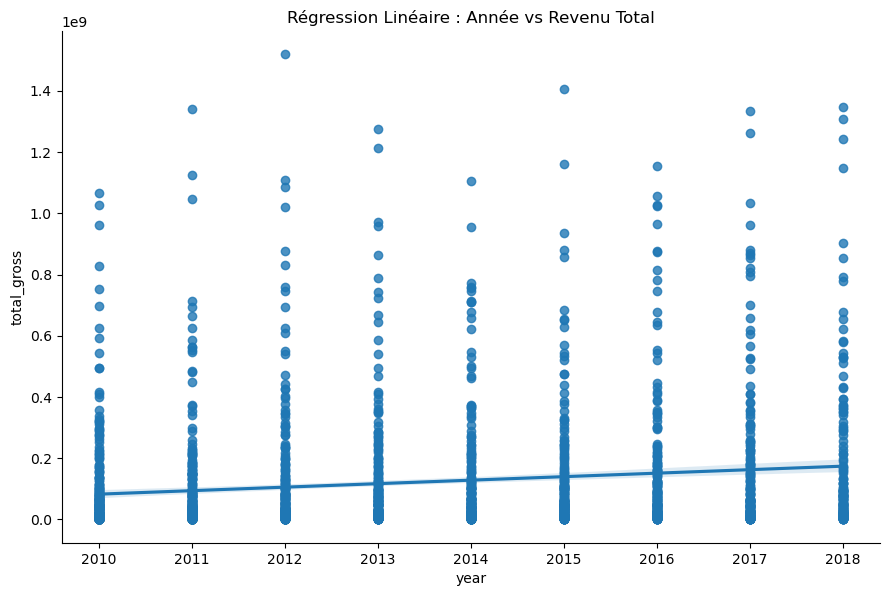

In [17]:
sns.lmplot(data=df_clean, x='year', y='total_gross', height=6, aspect=1.5)
plt.title("Régression Linéaire : Année vs Revenu Total")
plt.show()

## Régression Linéaire avec Statsmodels : Effet de l'Année sur les Revenus Totaux

Cette partie du code réalise une *régression linéaire OLS (Ordinary Least Squares)* pour modéliser la relation entre :

- **year** : l’année de sortie du film (variable explicative)
- **total_gross** : les recettes totales du film (variable dépendante)

---

### Code :

In [18]:
import statsmodels.api as sm

X = df_clean['year'].astype(int)
y = df_clean['total_gross']
X = sm.add_constant(X)  # Ajout d’une constante pour le modèle OLS
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     41.97
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.16e-10
Time:                        14:35:43   Log-Likelihood:                -41303.
No. Observations:                2009   AIC:                         8.261e+04
Df Residuals:                    2007   BIC:                         8.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.289e+10   3.55e+09     -6.444      0.0

### Recommandations commerciales

1. *Se concentrer sur les studios les plus rentables* : Les données indiquent qu'une poignée de studios dominent le marché.
2. *Adapter la stratégie internationale* : Les revenus étrangers représentent une part significative du box-office pour certains films.
3. *Optimiser le calendrier des sorties* : Identifier les périodes les plus lucratives pour maximiser les profits.

## Conclusion and Next Steps

*Résumé des constatations :*

- X studios dominent le marché du box office
- Les recettes internationales dépassent souvent les recettes domestiques
- Certaines périodes génèrent plus de revenus

*Prochaines étapes :*

- Ajouter d'autres sources de données pour affiner les recommandations (ex : IMDb pour qualité ou durée)
- Analyser l'impact des budgets (si disponibles)

-

E-mail: beaugert@yahoo.fr